# Classification

In [2]:
# Every line of code, where I didnt put a source or marked it as AI code, is from moodle and the professors Github repository


# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

c:\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.30.2 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.

In [3]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

df.head() 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.shape

(2111, 17)

In [5]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:

df['CAEC'].value_counts()

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [7]:
df['CALC'].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [8]:
df['MTRANS'].value_counts()

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import OneHotEncoder


df['CAEC'] = df['CAEC'].replace({
    'no': 1,
    'Sometimes': 2,
    'Frequently': 3,
    'Always': 4
})

df['CALC'] = df['CALC'].replace({
    'no': 1,
    'Sometimes': 2,
    'Frequently': 3,
    'Always': 4
})

hot_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")


variables_hot = ['MTRANS']
one_hot_encoded = hot_encoder.fit_transform(df[variables_hot]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables_hot)



C:\Users\dalli\AppData\Local\Temp\ipykernel_26784\4075777745.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CAEC'] = df['CAEC'].replace({
C:\Users\dalli\AppData\Local\Temp\ipykernel_26784\4075777745.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CALC'] = df['CALC'].replace({


In [10]:
from sklearn.preprocessing import LabelEncoder

le_variables = [ 'Gender','family_history_with_overweight', 'SMOKE', 'SCC', 'FAVC']

label_encoder = LabelEncoder()

df[le_variables] = df[le_variables].apply(label_encoder.fit_transform)



In [11]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [12]:
# I wanted to reduce the possible outputs, so I grouped some of them together

df['NObeyesdad'] = df['NObeyesdad'].replace({
    'Insufficient_Weight': '1: Insufficient_Weight',
    'Normal_Weight': '2: Normal_Weight',
    'Overweight_Level_I': '3: Overweight',
    'Overweight_Level_II': '3: Overweight',
    'Obesity_Type_I': '4: Obesity',
    'Obesity_Type_II': '4: Obesity',
    'Obesity_Type_III': '4: Obesity'
})

df['NObeyesdad'].value_counts()




NObeyesdad
4: Obesity                972
3: Overweight             580
2: Normal_Weight          287
1: Insufficient_Weight    272
Name: count, dtype: int64

In [13]:

# here I saw that the weight would indicate the output directly, so I dropped it

df = df.drop('Weight', axis=1)

df.head()

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,1,2: Normal_Weight,0,0,0,1,0
1,0,21.0,1.52,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,2: Normal_Weight,0,0,0,1,0
2,1,23.0,1.80,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,3,2: Normal_Weight,0,0,0,1,0
3,1,27.0,1.80,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,3,3: Overweight,0,0,0,0,1
4,1,22.0,1.78,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3: Overweight,0,0,0,1,0


In [14]:
X = df.drop('NObeyesdad', axis=1)
y_temp = df['NObeyesdad']

le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

y = tf.keras.utils.to_categorical(y_enc)


categories = list(le.classes_)
categories

['1: Insufficient_Weight', '2: Normal_Weight', '3: Overweight', '4: Obesity']

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)


chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

best_features = chi_2_features.fit(X_cat,y.astype(int))

pd.options.display.float_format = '{:.2f}'.format

df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
1,Age,392.05
11,FAF,178.21
12,TUE,143.43
3,family_history_with_overweight,104.97
18,MTRANS_Walking,98.46
10,SCC,76.02
7,CAEC,39.64
6,NCP,24.69
4,FAVC,21.65
14,MTRANS_Automobile,17.08


In [16]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [17]:
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
        layers.Dense(8, activation="relu"),
        layers.Dense(len(categories), activation="softmax")
    ]
)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 19)             │            76 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 568 (2.22 KB)

 Trainable params: 530 (2.07 KB)

 Non-trainable params: 38 (152.00 B)

In [18]:
model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4431 - loss: 6.9548 - val_accuracy: 0.4715 - val_loss: 6.4603
Epoch 2/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4978 - loss: 5.7329 - val_accuracy: 0.4580 - val_loss: 5.2266
Epoch 3/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5058 - loss: 4.6594 - val_accuracy: 0.4607 - val_loss: 4.1971
Epoch 4/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5095 - loss: 3.7358 - val_accuracy: 0.4824 - val_loss: 3.3404
Epoch 5/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5248 - loss: 2.9604 - val_accuracy: 0.5014 - val_loss: 2.6379
Epoch 6/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5299 - loss: 2.3288 - val_accuracy: 0.5122 - val_loss: 2.0758
Epoch 7/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5211 - loss: 1.8343 - val_accuracy: 0.5068 - val_loss: 1.6515
Epoch 8/300
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5306 - loss: 1.4819 - val_accuracy: 0.5149 - v

<Axes: >

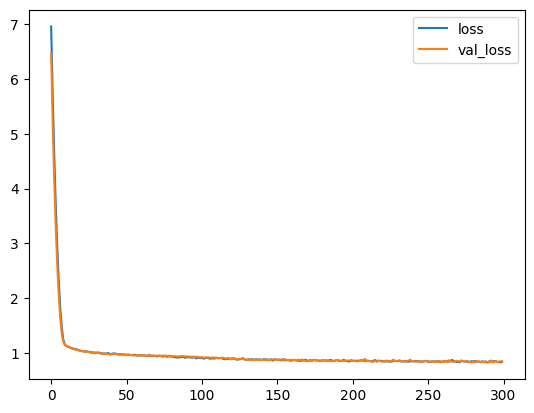

In [19]:
# There seems to be no overfitting, since accuracy and val_accuracy are nearly the same

loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

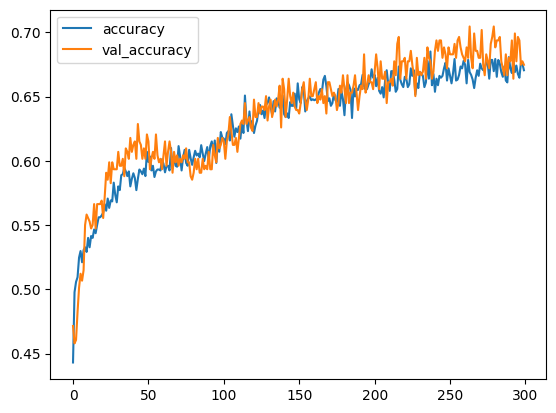

In [20]:


loss_df[['accuracy', 'val_accuracy']].plot()

In [21]:
# This matrix shows that the train and test data evaluation is nearly the same
# This is good because it indicates that learns on new data the same well as on the training data (no overfitting)
# The model guessed about 70% of the data correctly

print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.8469229340553284, 0.6810810565948486]

Train data evaluation:
[0.8049137592315674, 0.6836734414100647]


In [22]:
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

y_test = np.argmax(y_test, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


<Axes: >

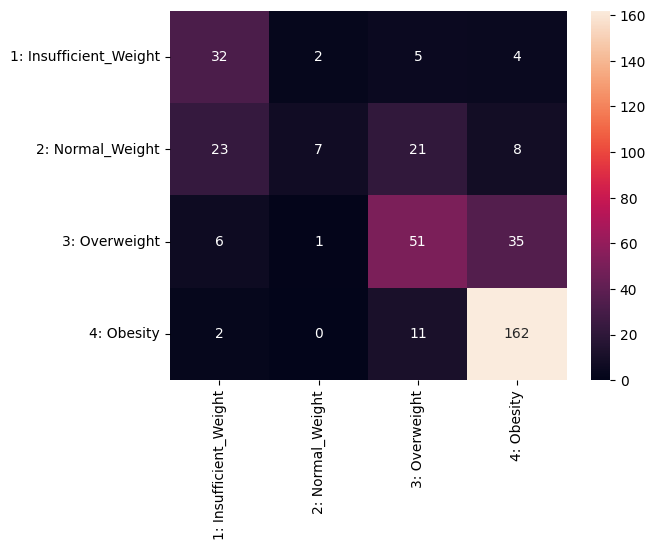

In [23]:
# The heatmap shows, what weight groups are estimated correctly from our model and how many are were categorized wrong.
# Notable is, that if the model chose obesity, it was correct most of the time. It was sometimes categorized as overweight and only a few time
# as normal or insufficient weight. Normal weight was not categorized very well. most people with normal weight were categorized wrong
# People, which were classified as overweight were often times obese. only 10 people were normal or insufficient weight. 
# If the model guessed insufficient weight, the model was right most of the time

sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g', 
            xticklabels=categories, yticklabels=categories)

In [24]:
# Interpretation of the classification matrix:
# precision (how often when the model guessed a class, it was correct): precision was the highest for Obesity (0.79) and the worst for normal weight (0.50)
# recall (how many of the actual class instances were guessed correctly): again obisity was the best (0.93) and normal weight the worst (0.30)
# f1-score combines both precisoin and recall
# support (how many datasets of which group are existing): Obesity had the most instances with 182 and insufficient weight the least with 45. 

# to summarize, The model works good for identifying obesity, for the other groups it was not very good.

print(classification_report(y_test, test_predictions, target_names=categories))

acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

                        precision    recall  f1-score   support

1: Insufficient_Weight       0.51      0.74      0.60        43
      2: Normal_Weight       0.70      0.12      0.20        59
         3: Overweight       0.58      0.55      0.56        93
            4: Obesity       0.78      0.93      0.84       175

              accuracy                           0.68       370
             macro avg       0.64      0.58      0.55       370
          weighted avg       0.68      0.68      0.64       370


Model overall accuracy: 68.11%


In [25]:
# the auc score tells us if the model is good or not
# if the score is 0.5, the model is not better than a random guess
# Here the score is 0.89, which is considered as good
# Scores between 0.9 and 1 would classify as excellent

roc_auc_score(y, model.predict(X), multi_class="ovr")

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step


0.8839738130814788

In [26]:
X.columns

Index(['Gender', 'Age', 'Height', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [27]:
df.head(3)

,Gender,Age,Height,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.00,1.62,1,0,2.00,3.00,2,0,2.00,0,0.00,1.00,1,2: Normal_Weight,0,0,0,1,0
1,0,21.00,1.52,1,0,3.00,3.00,2,1,3.00,1,3.00,0.00,2,2: Normal_Weight,0,0,0,1,0
2,1,23.00,1.80,1,0,2.00,3.00,2,0,2.00,0,2.00,1.00,3,2: Normal_Weight,0,0,0,1,0


In [28]:
tester_row = {
    'Gender': 1,                         
    'Age': 22.77789,                      
    'Height': 1.700499,
    'family_history_with_overweight': 1, 
    'FAVC': 1,                            
    'FCVC': 2.385502,
    'NCP': 3.0,
    'CAEC': 2,                            
    'SMOKE': 0,                          
    'CH2O': 2.0,
    'SCC': 0,                            
    'FAF': 1.0,
    'TUE': 0.62535,
    'CALC': 2,                            
    'MTRANS_Automobile': 0,              
    'MTRANS_Bike': 0,
    'MTRANS_Motorbike': 0,
    'MTRANS_Public_Transportation': 1,
    'MTRANS_Walking': 0
}

tester_row = pd.DataFrame([tester_row])
result = model.predict(tester_row)[0]
result_text = categories[np.argmax(result)]

np.set_printoptions(precision=9, suppress=True)

print(f"Predicted price range: {result_text}")
print()
print("Probabilities by class:")
print(categories)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted price range: 3: Overweight

Probabilities by class:
['1: Insufficient_Weight', '2: Normal_Weight', '3: Overweight', '4: Obesity']
[0.018527403 0.06465411  0.5686286   0.34818986 ]


In [29]:
X.shape

(2111, 19)